<a href="https://colab.research.google.com/github/MrVirul/datapreprocessing_MLPipeline/blob/main/Machine_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_data.csv")

In [3]:
display(df.head())

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
0,S001,Male,20.0,India,25,78.5,10,Pass
1,S002,Female,22.0,USA,30,82.0,12,Pass
2,S003,Male,19.0,Sri Lanka,18,45.0,8,Fail
3,S004,Female,21.0,India,28,88.0,9,Pass
4,S005,Female,18.0,USA,15,35.0,5,Fail


In [4]:
display(df.tail())

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
15,S016,Female,24.0,India,18,40.0,6,Fail
16,S017,Male,21.0,Sri Lanka,20,65.0,8,Pass
17,S018,Female,26.0,India,27,84.0,9,Pass
18,S019,Male,22.0,India,35,95.0,15,Pass
19,S020,Female,20.0,Sri Lanka,12,50.0,5,Fail


In [5]:
print(list(df.columns))

['StudentID', 'Gender', 'Age', 'Country', 'Lessons Completed', 'Quiz Score', 'Time Per Week', 'Result']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          20 non-null     object 
 1   Gender             20 non-null     object 
 2   Age                18 non-null     float64
 3   Country            20 non-null     object 
 4   Lessons Completed  20 non-null     int64  
 5   Quiz Score         18 non-null     float64
 6   Time Per Week      20 non-null     int64  
 7   Result             20 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ KB


In [7]:
df.describe()

,Age,Lessons Completed,Quiz Score,Time Per Week
count,18.000000,20.000000,18.000000,20.000000
mean,21.722222,22.350000,62.194444,8.550000
std,2.136670,7.596918,25.133256,3.316228
min,18.000000,10.000000,20.000000,3.000000
25%,20.000000,17.250000,41.250000,6.000000
50%,21.500000,23.500000,71.000000,8.500000
75%,23.000000,28.250000,83.500000,10.250000
max,26.000000,35.000000,95.000000,15.000000


In [8]:
df.fillna(df['Age'].mean(), inplace=True)

In [9]:
df.fillna(df['Quiz Score'].mean(), inplace=True)

In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Result'] = df['Result'].map({'Pass': 1, 'Fail': 0})

In [11]:
df["Engagement Level"] = df["Lessons Completed"] / (df["Time Per Week"] + 0.0001)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scale_cols = ['Age', 'Lessons Completed', 'Time Per Week', 'Engagement Level']
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result,Engagement Level
0,S001,1,0.250,India,0.60,78.5,0.583333,1,0.388892
1,S002,0,0.500,USA,0.80,82.0,0.750000,1,0.388894
2,S003,1,0.125,Sri Lanka,0.32,45.0,0.416667,0,0.246295
3,S004,0,0.375,India,0.72,88.0,0.500000,1,0.737453
4,S005,0,0.000,USA,0.20,35.0,0.166667,0,0.674063


In [16]:
print(df)

   StudentID  Gender       Age    Country  Lessons Completed  Quiz Score  \
0       S001       1  0.250000      India               0.60   78.500000   
1       S002       0  0.500000        USA               0.80   82.000000   
2       S003       1  0.125000  Sri Lanka               0.32   45.000000   
3       S004       0  0.375000      India               0.72   88.000000   
4       S005       0  0.000000        USA               0.20   35.000000   
5       S006       1  0.465278  Sri Lanka               0.00   25.000000   
6       S007       1  0.750000      India               0.88   90.000000   
7       S008       0  0.625000        USA               0.40   21.722222   
8       S009       1  0.875000      India               0.76   77.000000   
9       S010       0  0.250000  Sri Lanka               0.16   30.000000   
10      S011       1  0.500000      India               0.60   50.000000   
11      S012       0  0.375000        USA               0.84   85.000000   
12      S013

In [17]:
#Simple Machine Learning Model

In [20]:
x = df.drop(columns=["StudentID", "Result", "Country"])
y = df["Result"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



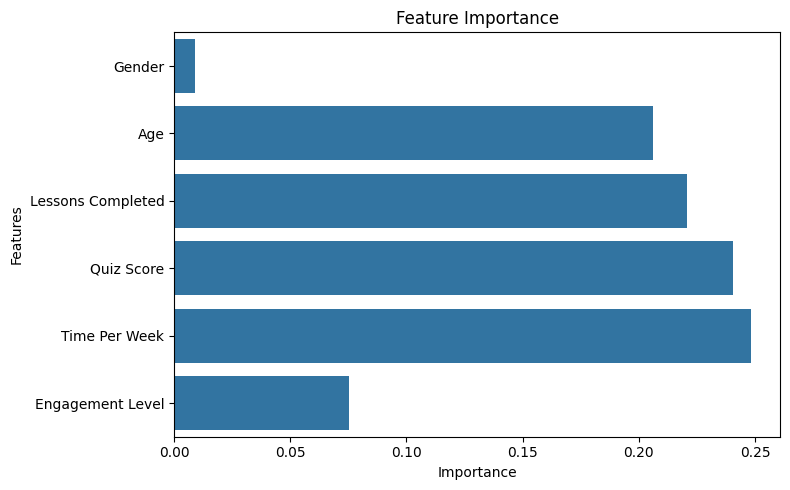

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.feature_importances_
features = x.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()